# Proyek Analisis Data: [E-Commerce Public Dataset]
- **Nama:** [Muhammad Rafli Nugrahasyach]
- **Email:** [raflinugrahasyach26@gmail.com]
- **ID Dicoding:** [raflinugrahas]

## Menentukan Pertanyaan Bisnis

- Bagaimana kinerja order atau pengiriman barang bisa mempengaruhi kepuasan para customer pada tahun 2016-2018?
- Bagaimana karakteristik kota yang membeli suatu produk tertentu pada 2016-2018?

## Import Semua Packages/Library yang Digunakan

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [ ]:
df_reviews = pd.read_csv('olist_order_reviews_dataset.csv') # Sebagai variabel respon (Y)
df_cust = pd.read_csv('olist_customers_dataset.csv')
df_orders = pd.read_csv('olist_orders_dataset.csv')
df_order_items = pd.read_csv('olist_order_items_dataset.csv')
df_geo = pd.read_csv('olist_geolocation_dataset.csv')
df_products = pd.read_csv('olist_products_dataset.csv')
df_seller = pd.read_csv('olist_sellers_dataset.csv')

### Assessing Data

In [ ]:
df_products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [ ]:
df_reviews_cust = pd.merge(df_orders, df_reviews, on='order_id', how='inner')

#### Pertanyaan 1

In [ ]:
# Mengubah data type masing-masing fitur

df_reviews_cust['review_score'] = df_reviews_cust['review_score'].astype(np.float32)
df_reviews_cust['order_estimated_delivery_date'] = pd.to_datetime(df_reviews_cust['order_estimated_delivery_date'])
df_reviews_cust['order_delivered_customer_date'] = pd.to_datetime(df_reviews_cust['order_delivered_customer_date'])

# Menambahkan kolom baru untuk selisih antara estimasi dengan delivery order
df_order_duration = df_reviews_cust['order_estimated_delivery_date'] - df_reviews_cust['order_delivered_customer_date']
df_order_duration = pd.DataFrame(df_order_duration, columns=['order_duration'])

print(df_reviews_cust.info())
print(len(df_reviews_cust))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99224 non-null  object        
 1   customer_id                    99224 non-null  object        
 2   order_status                   99224 non-null  object        
 3   order_purchase_timestamp       99224 non-null  object        
 4   order_approved_at              99068 non-null  object        
 5   order_delivered_carrier_date   97468 non-null  object        
 6   order_delivered_customer_date  96359 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99224 non-null  datetime64[ns]
 8   review_id                      99224 non-null  object        
 9   review_score                   99224 non-null  float32       
 10  review_comment_title           11568 non-null  object        
 11  review_comment_

In [ ]:
df_reviews_cust.isna().sum()

order_id                             0
customer_id                          0
order_status                         0
order_purchase_timestamp             0
order_approved_at                  156
order_delivered_carrier_date      1756
order_delivered_customer_date     2865
order_estimated_delivery_date        0
review_id                            0
review_score                         0
review_comment_title             87656
review_comment_message           58247
review_creation_date                 0
review_answer_timestamp              0
dtype: int64

In [ ]:
df_order_vis = pd.concat((df_order_duration, df_reviews_cust['review_score']), axis = 1)
df_order_duration.describe()

,order_duration
count,96359
mean,11 days 05:16:48.424028891
std,10 days 02:47:38.331570028
min,-189 days +00:35:53
25%,6 days 09:51:08.500000
50%,11 days 23:23:29
75%,16 days 06:01:59.500000
max,146 days 00:23:13


In [ ]:
# Handling missing value dan duplikasi data

# Missing value
df_order_vis = df_order_vis.dropna()
print(df_order_vis.isna().sum())

# Duplikasi data
df_order_vis = df_order_vis.drop_duplicates()
print(df_order_vis.duplicated().sum())

print(df_order_vis.isna().sum())
print(len(df_order_vis))

order_duration    0
review_score      0
dtype: int64
0
order_duration    0
review_score      0
dtype: int64
93903


#### Pertanyaan 2

In [ ]:
df_prod_o_items = pd.merge(df_products, df_order_items, on='product_id', how='inner')
df_o_items_seller = pd.merge(df_prod_o_items, df_seller, on='seller_id', how='inner')
df_seller_geo = pd.merge(df_o_items_seller, df_geo, left_on='seller_zip_code_prefix', right_on='geolocation_zip_code_prefix', how='inner')

In [ ]:
df1 = df_cust[['customer_zip_code_prefix', 'customer_city']]
df2 = df_seller_geo[['geolocation_zip_code_prefix', 'product_category_name']]

In [ ]:
df_cust_seller_geo = pd.merge(
    df1,
    df2,
    left_on='customer_zip_code_prefix',
    right_on='geolocation_zip_code_prefix',
    how='inner'
)

In [ ]:
df_cust_seller_geo.duplicated().sum()

391754978

In [ ]:
df_cust_seller_geo = df_cust_seller_geo.drop_duplicates()

In [ ]:
df_cust.head(3)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP


In [ ]:
df_o_items_seller.head(2)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value,seller_zip_code_prefix,seller_city,seller_state
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,e17e4f88e31525f7deef66779844ddce,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-04-30 17:33:54,10.91,7.39,3694,sao paulo,SP
1,a035b83b3628decee6e3823924e0c10f,perfumaria,53.0,2235.0,3.0,1450.0,20.0,25.0,20.0,b18cb761efbe70da4838435a349abd07,1,5670f4db5b62c43d542e1b2d56b0cf7c,2018-07-06 19:31:03,268.38,21.07,3694,sao paulo,SP


In [ ]:
print(df_geo.head(3))

   geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  


In [ ]:
print(df_products.head(3))

                         product_id product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5            perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                 artes   
2  96bd76ec8810374ed1b65e291975717f         esporte_lazer   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  


### Cleaning Data

In [ ]:
# Untuk pertanyaan 1
print(df_order_vis.head())

# Untuk pertanyaan 2
print(df_cust_seller_geo.head())

    order_duration  review_score
0  7 days 02:34:47           4.0
1  5 days 08:32:15           4.0
2 17 days 05:53:31           5.0
3 12 days 23:31:18           5.0
4  9 days 05:42:58           5.0
        customer_zip_code_prefix   customer_city  geolocation_zip_code_prefix  \
0                          13056        campinas                        13056   
1570                       13056        campinas                        13056   
105504                     89254  jaragua do sul                        89254   
106092                     89254  jaragua do sul                        89254   
108150                     89254  jaragua do sul                        89254   

                    product_category_name  
0                              perfumaria  
1570    construcao_ferramentas_construcao  
105504                         brinquedos  
106092                         cool_stuff  
108150                              bebes  


## Exploratory Data Analysis (EDA)

### Explore ...

### Pertanyaan 1

In [ ]:
df_order_vis.head(2)

,order_duration,review_score
0,7 days 02:34:47,4.0
1,5 days 08:32:15,4.0


In [ ]:
# Melakukan kategorisasi durasi order menjadi cepat, normal, dan lama
# Sangat cepat: di atas 7 hari, Cepat: di atas 0 - 7 hari, Normal: 0, Lama: 0 hingga -7 hari, Sangat lama: di atas -7 hari
# Kategorisasi ini bertujuan untuk mengetahui tingkat rating berdasarkan durasi pengiriman hingga sampai orderan tersebut

def order_duration_cat(duration):
    if duration > pd.Timedelta(days=7):
        return 'Sangat Cepat'
    elif pd.Timedelta(days=0) < duration <= pd.Timedelta(days=7):
        return 'Cepat'
    elif duration == pd.Timedelta(days=0):
        return 'Normal'
    elif pd.Timedelta(days=-7) <= duration < pd.Timedelta(days=0):
        return 'Lama'
    else:
        return 'Sangat Lama'

df_order_vis_cat = df_order_vis['order_duration'].apply(order_duration_cat)

df_order_vis_cat

0        Sangat Cepat
1               Cepat
2        Sangat Cepat
3        Sangat Cepat
4        Sangat Cepat
             ...     
99219    Sangat Cepat
99220           Cepat
99221           Cepat
99222    Sangat Cepat
99223    Sangat Cepat
Name: order_duration, Length: 93903, dtype: object

In [ ]:
df_order_vis_cat['order_duration_cat'] = pd.DataFrame(df_order_vis_cat)
df_order_vis_cat['order_duration_cat']

,order_duration
0,Sangat Cepat
1,Cepat
2,Sangat Cepat
3,Sangat Cepat
4,Sangat Cepat
...,...
99219,Sangat Cepat
99220,Cepat
99221,Cepat
99222,Sangat Cepat


In [ ]:
df_order_vis['review_score']

0        4.0
1        4.0
2        5.0
3        5.0
4        5.0
        ... 
99219    5.0
99220    4.0
99221    5.0
99222    2.0
99223    5.0
Name: review_score, Length: 93903, dtype: float32

In [ ]:
df_order_vis_all = pd.concat((df_order_vis_cat['order_duration_cat'], df_order_vis['review_score']), axis=1)
df_order_vis_all = pd.DataFrame(df_order_vis_all)
df_order_vis_all

,order_duration,review_score
0,Sangat Cepat,4.0
1,Cepat,4.0
2,Sangat Cepat,5.0
3,Sangat Cepat,5.0
4,Sangat Cepat,5.0
...,...,...
99219,Sangat Cepat,5.0
99220,Cepat,4.0
99221,Cepat,5.0
99222,Sangat Cepat,2.0


### Pertanyaan 2

In [ ]:
df_cust_seller_geo

,customer_zip_code_prefix,customer_city,geolocation_zip_code_prefix,product_category_name
0,13056,campinas,13056,perfumaria
1570,13056,campinas,13056,construcao_ferramentas_construcao
105504,89254,jaragua do sul,89254,brinquedos
106092,89254,jaragua do sul,89254,cool_stuff
108150,89254,jaragua do sul,89254,bebes
...,...,...,...,...
391747652,9336,maua,9336,NaN
391747660,9336,maua,9336,utilidades_domesticas
391747668,7112,guarulhos,7112,automotivo
391760718,5315,sao paulo,5315,utilidades_domesticas


## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [ ]:
x2 = pd.DataFrame(df_order_vis_all['order_duration'])
y2 = pd.DataFrame(df_order_vis_all['review_score'])

In [ ]:
df_order_dur_vis = pd.DataFrame(df_order_vis_all['order_duration'])
df_review_score_vis = pd.DataFrame(df_order_vis_all['review_score'])

print(df_order_dur_vis)

      order_duration
0       Sangat Cepat
1              Cepat
2       Sangat Cepat
3       Sangat Cepat
4       Sangat Cepat
...              ...
99219   Sangat Cepat
99220          Cepat
99221          Cepat
99222   Sangat Cepat
99223   Sangat Cepat

[93903 rows x 1 columns]


In [ ]:
df_review_score_vis

,review_score
0,4.0
1,4.0
2,5.0
3,5.0
4,5.0
...,...
99219,5.0
99220,4.0
99221,5.0
99222,2.0


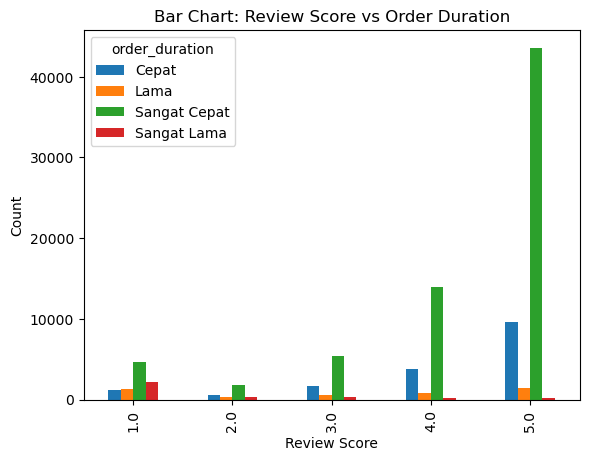

In [ ]:
merged_df = pd.concat((df_review_score_vis, df_order_dur_vis), axis=1)

# Membuat bar chart
grouped_df = merged_df.groupby(['review_score', 'order_duration']).size().unstack(fill_value=0)
grouped_df.plot(kind='bar', stacked=False)

# Menambahkan label pada sumbu
plt.xlabel('Review Score')
plt.ylabel('Count')

# Menambahkan judul
plt.title('Bar Chart: Review Score vs Order Duration')

# Menampilkan plot
plt.show()

### Pertanyaan 2:

In [ ]:
df_cust_seller_geo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6040 entries, 0 to 391760946
Data columns (total 4 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   customer_zip_code_prefix     6040 non-null   int64 
 1   customer_city                6040 non-null   object
 2   geolocation_zip_code_prefix  6040 non-null   int64 
 3   product_category_name        5806 non-null   object
dtypes: int64(2), object(2)
memory usage: 235.9+ KB


In [ ]:
x_cust = df_cust_seller_geo['customer_city']
y_cust = df_cust_seller_geo['product_category_name']

C:\Users\Rafli\AppData\Local\Temp\ipykernel_31564\2687569068.py:23: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('tab10', len(df_filtered['product_category_name'].unique()))


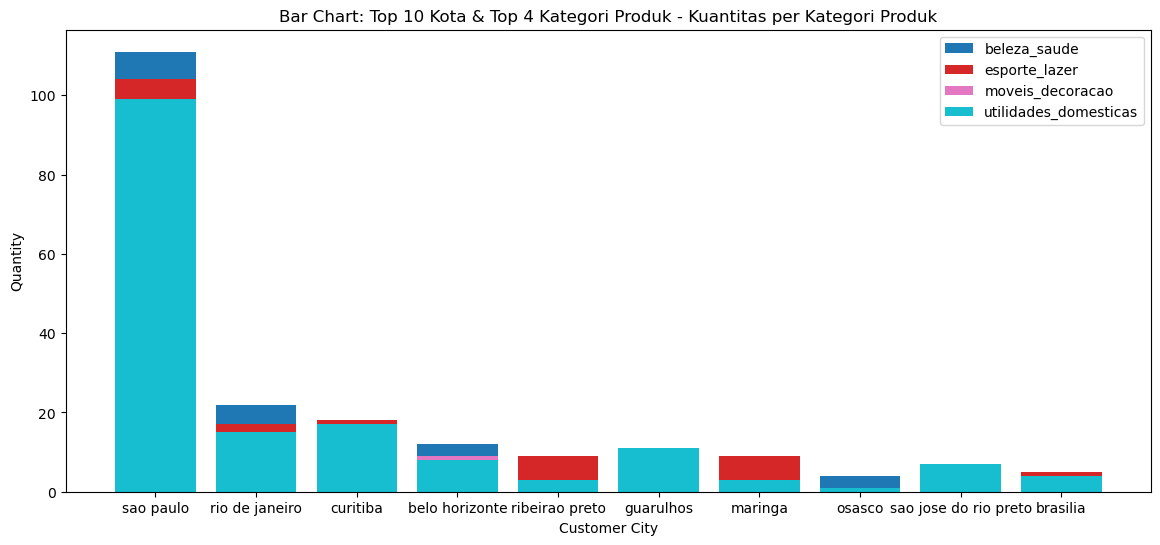

In [ ]:
# Mengelompokkan berdasarkan kategori produk dan kota, kemudian menghitung jumlah frekuensi setiap kategori
df_category_counts = df_cust_seller_geo.groupby(['product_category_name', 'customer_city']).size().reset_index(name='quantity')

# Mengurutkan DataFrame berdasarkan jumlah quantity dari yang tertinggi ke terendah
df_category_counts_sorted = df_category_counts.sort_values(by='quantity', ascending=False)

# Memilih 10 kota teratas
top_10_cities = df_category_counts_sorted['customer_city'].unique()[:10]

# Memilih 4 kategori produk teratas
top_4_categories = df_category_counts_sorted['product_category_name'].unique()[:4]

# Memfilter DataFrame untuk hanya menyertakan data dari 10 kota teratas dan 4 kategori teratas
df_filtered = df_category_counts_sorted[
    (df_category_counts_sorted['customer_city'].isin(top_10_cities)) &
    (df_category_counts_sorted['product_category_name'].isin(top_4_categories))
]

# Membuat bar chart
fig, ax = plt.subplots(figsize=(14, 6))

# Menggunakan warna berbeda untuk setiap kategori produk
colors = plt.cm.get_cmap('tab10', len(df_filtered['product_category_name'].unique()))

for i, (category, group) in enumerate(df_filtered.groupby('product_category_name')):
    ax.bar(group['customer_city'], group['quantity'], color=colors(i), label=category)

# Menambahkan label pada sumbu
plt.xlabel('Customer City')
plt.ylabel('Quantity')

# Menambahkan judul
plt.title('Bar Chart: Top 10 Kota & Top 4 Kategori Produk - Kuantitas per Kategori Produk')

# Menambahkan legenda
plt.legend()

# Menampilkan plot
plt.show()

## Conclusion

- Pertanyaan 1: "Bagaimana kinerja order bisa mempengaruhi kepuasan para customer pada tahun 2016-2018?" didapatkan kesimpulan bahwa dengan pengiriman yang cepat hingga sangat cepat, ratingnya bisa menjadi tinggi, sedangkan pengiriman lambat membuat rating menjadi rendah. Maka dari itu, tindakan yang bisa diambil dan dipertimbangkan adalah melakukan pengontrolan pada bagian pengiriman supaya tidak terjadi keterlambatan

- Pertanyaan 2: "Bagaimana clustering wilayah yang membeli suatu produk tertentu pada 2016-2018?" didapatkan kesimpulan bahwa kota Sao Paulo berada di tingkat pertama dengan pemesanan barang terbanyak yaitu kategori produk 'utilidades_domesticas', disusul dengan kota Rio de Janeiro, Curitiba, Belo Horizonte, dan Ribeirao Preto yang juga melakukan pemesanan barang dengan kategori produk 'utilidades_domesticas'. Tindakan yang dapat diambil adalah melakukan inovasi pada produk-produk yang mendapatkan transaksi terbanyak pada kota-kota yang melakukan pemesanan terbanyak pula, sehingga profit dapat semakin tinggi pada waktu-waktu yang akan datang.